In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### We will be working with a folder containing many separate .csv files. We start by investigating the structure of these files. 
#### The first thing of notice is that many of the tables are just finer grained versions of the other ones, i. e. not only the quantities of interest are tracked daily, but also hourly and by the minute. These informations are not by themselves redundant; it depends on our analysis goal, and that's what we are going to state shortly. 


In [21]:
##Import the files
daily_act = pd.read_csv("dailyActivity_merged.csv")
daily_cal = pd.read_csv("dailyCalories_merged.csv")
daily_steps = pd.read_csv("dailySteps_merged.csv")
daily_sleep = pd.read_csv("sleepDay_merged.csv")
weight_log = pd.read_csv("weightLogInfo_merged.csv")
hourlyCalories = pd.read_csv("hourlyCalories_merged.csv")
hourlySteps = pd.read_csv("hourlySteps_merged.csv")


 As stated by our stakeholders, we are dealing with a relatively small sample. Even though with that number we could arrive at some statistically relevant results - within a certain margin of error -, we cannot be sure that this sample is representative of FitBit's clients at large, since the sampling was not random. It is possible that people who willingly sent their data are more likely to share some characterists when compared to people who didn't. It's worthy noting that Bellabeat's clients may also differ from the general population when it comes to health habits. For this reason, it might not be wise to apply results from the general population when trying to describe our more restricted sample.

 It doesn't stop there. Not only is the dataset relatively small, but not all tables have informations about all the participants. 
#### In the print( ) code below, we can see that the number of unique ID's (That is, individuals) vary between tables. In fact, so few people gave away their weight logs, that even though weight might be one of the best predictors of someone's health, we won't be using it in order not to skew the analysis.
 Still, if taken with a grain of salt, we believe that great insights can come out of this dataset. We may not be able to state with certainty, but our analysis might show trends that are worthy investigating and acting on. More on that after the analysis.


In [6]:
print(  "Daily Calories Unique Ids :", daily_cal['Id'].nunique(), "\n" #Here, we simply isolate the 'Id' column in a DataFrame
        "Daily Activity Unique Ids :",  daily_act['Id'].nunique(),"\n" # and calculate how many unique IDs there are. The results
        "Daily Sleep Unique Ids :",     daily_sleep['Id'].nunique(),"\n" # are printed below. 
        "Daily Steps Unique Ids :",     daily_steps['Id'].nunique(),"\n"
        "Weight Log Unique Ids :",      weight_log['Id'].nunique(),"\n"
        "Hourly Steps Unique Ids :",    hourlySteps['Id'].nunique(),"\n"
        "Hourly Calories Unique Ids :", hourlyCalories['Id'].nunique()
                  
     )

Daily Calories Unique Ids : 33 
Daily Activity Unique Ids : 33 
Daily Sleep Unique Ids : 24 
Daily Steps Unique Ids : 33 
Weight Log Unique Ids : 8 
Hourly Steps Unique Ids : 33 
Hourly Calories Unique Ids : 33


#### We can see below what kind of features are present in this dataset. As described by the stakeholders, this dataset consists of 33 individual health data as they were recorded by their personal tracking devices. 

Not being health professionals, we should tread carefully when doing assements about health issues, specially we will be giving high level recommendations based on our analysis. Whenever possible, we should cite some source. 

Since we are worried about health outcomes, we will be choosing the following two target variables to be our measure of a person's healthiness; 'Calories'¹ and 'TotalMinutesAsleep' (Present in the 'daily_sleep' Dataframe). 

It's impossible to make absolute statements about caloric expenditure; this tends to vary greatly from person to person, based on gender, age, metabolic rate, etc. Still, we can try to find a correlation between physical activity and calories spent. Higher levels of calories expenditure could be indicative of higher muscle growth, muscle mass, fat loss and, more generally, a higher level of body activity as indicated by calorie expenditure might lead to an improvement in mental and emotional life. 
The same goes for minutes of sleep. Sleep plays a central role in the maintenance and regulation of our health. If Bellabeat's clients are looking for certain outcomes, such as weight loss and muscle gain, sleep deprivation would be one of the main factors hindering it. 

#### In what follows, we will be trying to understand how activity intensities and sendentary habits correlate with our chosen health indicators: calories spent and sleep time.



 
¹'Calories' is to be understood as calories spent during the day. 

*A quick sum( ) show us that the calories and sleep time measured on the hourly tables are the same as the daily tables, with a small error, probably due to rounding, for our purposes, we will consider these tables to be the same.

#### 

In [4]:
daily_act.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### Next, we will be joining tables. 

We will use 'daily_cal' and 'daily_sleep', but as we have seen above, they don't have the same number of unique IDs. That means that when joining both tables, many some rows would have null features. We don't want that. The table will be pruned to exclude all nulls, but, as a result, we will be dealing with a smaller dataset. How big is the loss of information will be shown below. 

In [22]:
daily_act['ActivityDate'] = pd.to_datetime(daily_act['ActivityDate']) #When we join the table, we not only will be joining by IDs,
daily_act['ActivityDate'] = daily_act['ActivityDate'].dt.date         #But also by 'date'. We want activity intensity and calories
                                                                    #to align with the amount of sleep the individual had 
                                                                    #on that same day.
                                                                    #Dates where not on the same format on both tables, that meant
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay'])   #our join() or merge() with two keys would not work properly.
daily_sleep['SleepDay'] = daily_sleep['SleepDay'].dt.date
daily_sleep['SleepDay'] = daily_sleep['SleepDay'].to_frame()
daily_sleep = daily_sleep.drop(['TotalSleepRecords'], axis=1)

In [24]:
health_table = pd.merge(daily_sleep, daily_act,  how='inner', left_on=['Id','SleepDay'], right_on = ['Id','ActivityDate'])
health_table ## Inner join will exclude all Ids that are not present in both tables. The resulting dataframe has 413 rows.
              # against 940 in the daily_cal table alone.

,Id,SleepDay,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,327,346,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,384,407,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-15,412,442,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
3,1503960366,2016-04-16,340,367,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
4,1503960366,2016-04-17,700,712,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,343,360,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896
409,8792009665,2016-05-01,503,527,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962
410,8792009665,2016-05-02,415,423,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015
411,8792009665,2016-05-03,516,545,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297


### Some additional cleaning is in order.

If we filter out Dataframe by 'Id' and use .describe( ) to get the main statistics, we find out that some individuals' sleep time are within ranges that seem humanly improbable. Getting the number of unique Ids per feature, we find out that these same individuals are among those with the least amount of contributions. We will deem them outliers and they will be excluded from our analysis. More details can be found in the comments inside the notebooks bellow. 

In [34]:
health_table.groupby(['Id']).median().round()

C:\Users\mathe\AppData\Local\Temp\ipykernel_12128\2359667014.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  health_table.groupby(['Id']).median().round()


,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,,,
1503960366,340.0,367.0,12207.0,8.0,8.0,0.0,3.0,1.0,5.0,0.0,38.0,20.0,221.0,775.0,1859.0
1644430081,130.0,148.0,5241.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,222.0,904.0,2784.0
1844505072,644.0,961.0,3844.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,176.0,527.0,1725.0
1927972279,398.0,422.0,980.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,55.0,986.0,2221.0
2026352035,516.0,546.0,5260.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,248.0,658.0,1514.0
2320127002,61.0,69.0,5079.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,242.0,1129.0,1804.0
2347167796,445.0,489.0,9471.0,6.0,6.0,0.0,0.0,1.0,4.0,0.0,1.0,11.0,229.0,676.0,2038.0
3977333714,292.0,468.0,11604.0,8.0,8.0,0.0,2.0,2.0,3.0,0.0,15.0,56.0,177.0,712.0,1572.0
4020332650,374.0,405.0,5704.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,2.0,8.0,201.0,815.0,3070.0


In [36]:
health_table.groupby(['Id'])['TotalMinutesAsleep'].nunique() ## Comparing with the table above, we can see that individuals with
                                                    ## abnormal sleep time also logged their information less than five times.
                                                    ## For example: ID '2320127002', with median sleep time of 61 minutes has
                                                    ## only one entry.

Id
1503960366    24
1644430081     4
1844505072     3
1927972279     5
2026352035    24
2320127002     1
2347167796    15
3977333714    27
4020332650     8
4319703577    24
4388161847    23
4445114986    24
4558609924     5
4702921684    25
5553957443    30
5577150313    26
6117666160    17
6775888955     3
6962181067    30
7007744171     2
7086361926    21
8053475328     3
8378563200    29
8792009665    15
Name: TotalMinutesAsleep, dtype: int64

In [40]:
## We proceed to exclude them from the table. The resulting dataframe has 401 rows.
health_table = health_table[(health_table.Id != 2320127002) & (health_table.Id != 4558609924) & (health_table.Id !=1644430081) & (health_table.Id != 7007744171)]
health_table

,Id,SleepDay,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,327,346,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,384,407,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-15,412,442,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
3,1503960366,2016-04-16,340,367,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
4,1503960366,2016-04-17,700,712,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,343,360,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896
409,8792009665,2016-05-01,503,527,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962
410,8792009665,2016-05-02,415,423,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015
411,8792009665,2016-05-03,516,545,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297


## Correlation matrix.

Next, we will create a correlation matrix to try to understand how the data correlates. Below, there will be two heat map; these are a visual representation of the correlation matrix. Values vary from -1 to 1 - from strong negative correlation to strong positive correlation. Values close to 0 indicate that the two variables are not correlated.

It may be tempting to act on correlations of any degree that reveals themselves in our data, but reality is often messy and it may not be wise to act on scores that are closer to 0 than they are to 1. Since the sample on which our analysis is based is small and not random, and our recommendations will affect business decisions - including the alocation of scarce ressources - our |cutting point| of significance will be 0.5 and above. It's worthy pointing out that low correlation may also be useful information.

Our findings are the following:

#### Some of the correlation points above 0.5 are not very interesting for us: Total Steps are highly correlated with Total Distance. We can take this as an indication that there are no numerical instabilities leading to random results. 

#### More interestingly, Calories are correlated with Fairly Active Minutes, but the correlation score drops significantly for Fairly and Lightly Active Minutes. 

#### Sedentary Minutes are negatively correlated with Minutes Asleep. 



In [27]:
## We will drop some columns that won't be giving us very useful information for our goals.
## For example: We expect 'VeryActiveDistance' to be mostly contained in 'VeryActiveMinutes'. 
##So we will keep just one of them.
corr_matrix = health_table.corr()
corr_matrix = corr_matrix.drop(columns=['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'LoggedActivitiesDistance', 'TrackerDistance', 'Id'])
corr_matrix = corr_matrix.drop(index=['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'LoggedActivitiesDistance', 'TrackerDistance', 'Id'])

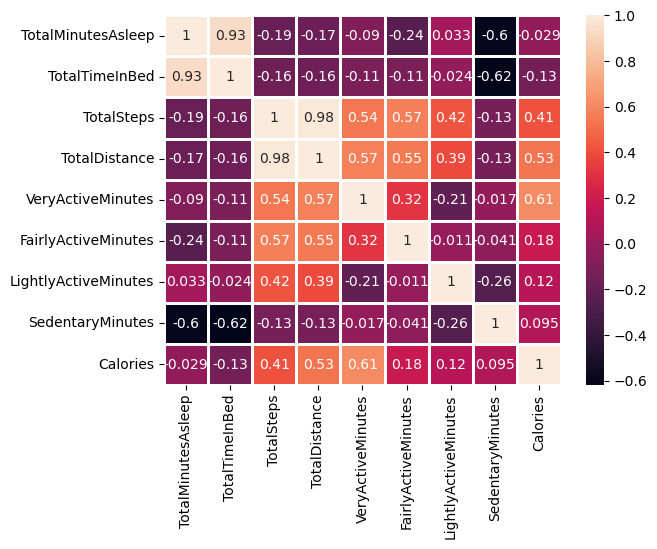

In [41]:

sns.heatmap(corr_matrix, annot=True, linewidths=2)
plt.show()

Below, we evaluate the correlation matrix for the daily_act dataframe, containing the full 913 rows, to see if there are any relevant discrepancies. That's not the case and it seems like the reduced sample size didn't affect our findings by much.

C:\Users\mathe\AppData\Local\Temp\ipykernel_12128\1020125251.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  activity_matrix = daily_act.corr()


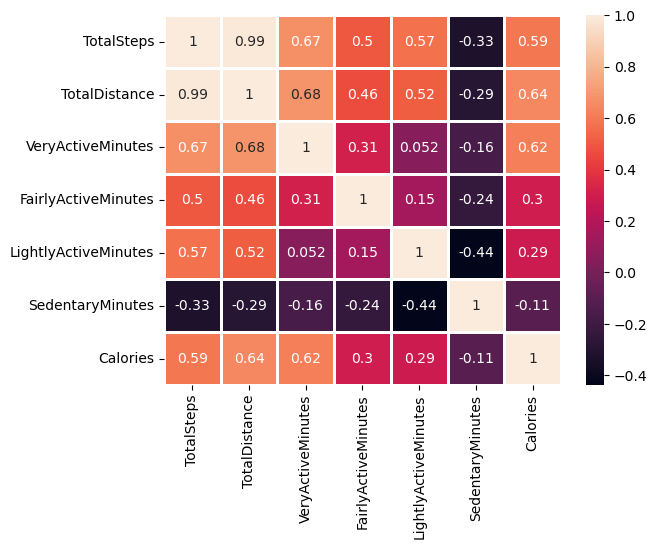

In [44]:
activity_matrix = daily_act.corr()
activity_matrix = activity_matrix.drop(columns=['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'LoggedActivitiesDistance', 'TrackerDistance', 'Id'])
activity_matrix = activity_matrix.drop(index=['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'LoggedActivitiesDistance', 'TrackerDistance', 'Id'])
sns.heatmap(activity_matrix, annot=True, linewidths=2)
plt.show()

### Let's investigate the relation between sedentary behaviour and time asleep.

Healthy sleep time for an adult ranges from 7 to 9 hours a day. With this information, find out thtat 42% of the sample is not getting the recommended minimum amount of sleep. 

We know that sedentary people are also having less sleep time. Could they be spending more time awake in bed? We tried adding a 'Minutes Awake' column to our data frame by subtracting 'MinutesAsleep' from 'TimeInBed'. But there were no significant correlations to this new table. 


In [51]:
len(health_table[(health_table.TotalMinutesAsleep < 420)])/len(health_table) ## 42% of users are sleeping less than what is recommended for an adult

0.42643391521197005

# Recommendations

We assume that people who use personal fitness trackers are more likely to do physical activities and to pursue concrete goals. We also may assume that one of the most commun of these goals may be weight loss. Even though our data won't allow us to speak directly about weight mesures, we might take calories spent as a predictor of someone's ability to lose weight. We found out that intense physical activity is positively correlated with the amount of calories spend, but, more surprisingly, physical activities of a more moderate or light level of intensity doesn't seem to correlate significatly with calories. 
As a result of the above, we may hypothesize that users of personal fitness trackers could more easily achieve their goals if they were made aware - and contantly reminded - that not only physical activity is necessary, but it has to be intense. 


We also note that almost half of the individuals in our sample are not getting enough sleep. This can have all sort of harmful health effects. We assume that our target audience is specially attached to fitness goals such as weight loss and muscle gain, and both variables are deeply affected by sleep deprivation. 
This could be remediated with reminders and alarms that inform the user that he is not getting enough sleep. These reminders should take age into consideration. 
More importatly, we learned that sleep deprivation is strongly correlated with sedentary behaviour. Medical academic sources seem to confirm our findings. Here, even light physical activities are enough to offset the negative effect. 

